In [1]:
### Imports:

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 8, 8
import scipy as sp
import scipy.optimize
import scipy.stats as stat
import pandas as pd

In [2]:
### Notes
# spacer thickness = 7.53 ± 0.01 mm
# 2.131 ± 0.001 megaohms -> 22 degrees celsius 
# .5  ± 0.05 kV high voltage

In [3]:
### Parameters 

e_lit = -1.602176634e-19
nu_o = 1.824e-5 # N-s/m^2 Viscosity of air, uncorrected for radius
g = 9.8 # m/s^2 Acceleration of gravity
rho = 886 # kg/m^3 Density of oil droplet
b = 8.20e-3 #N/m Viscosity correction factor
p = 1.013e+5 #N/m^2 pressure
v = 500 #volts
d = 7.53e-3
sigma_d = 0.01e-3


In [4]:
### Pixels to mm and m

pix_per_mm_0 = 0.0028266711
pix_per_mm_1 = 0.0026737433
pix_per_mm_2 = 0.0026837443
pix_per_mm_mu = np.mean([pix_per_mm_0,pix_per_mm_1,pix_per_mm_2])
pix_per_mm_sigma = np.std([pix_per_mm_0,pix_per_mm_1,pix_per_mm_2])
print(f'{pix_per_mm_mu} ± {pix_per_mm_sigma} mm/pixel')

pix_per_m_mu = pix_per_mm_mu/1000
pix_per_m_sigma = pix_per_mm_sigma/1000
print (f'{pix_per_m_mu} ± {pix_per_m_sigma} m/pixel')


0.0027280528999999998 ± 6.9853022023293e-05 mm/pixel
2.7280528999999996e-06 ± 6.9853022023293e-08 m/pixel


In [5]:
### importing csv file 

velocities = pd.read_csv("velocities.csv")
# print (velocities)
v_f = velocities["v_f"]
sigma_vf = velocities["sigma_v_f"]
v_E = velocities["v_E"]
sigma_v_E = velocities["sigma_v_E"]


In [6]:
### Calculating droplet radius and uncertainties 

def droplet_radius(v):
    alpha = b/(2*p) 
    gamma = (9*nu_o)/(2*rho*g)
    a = np.sqrt(alpha**2 + gamma*v) - alpha
    return a
 
def droplet_radius_sigma(v, sigma_v):
    alpha = b/(2*p)
    gamma = (9*nu_o)/(2*rho*g)
    sigma_a = np.sqrt((gamma*sigma_v)**2/(4*(alpha**2 + gamma*v)))
    return sigma_a

radius = droplet_radius(v_f)
sigma_radius = droplet_radius_sigma(v_f, sigma_vf)

print (radius)
print (sigma_radius)

0     7.886684e-08
1     7.990642e-08
2     8.749271e-08
3     5.134793e-08
4     1.229473e-07
5     1.243473e-07
6     2.175232e-07
7     2.017183e-07
8     1.950081e-07
9     9.178445e-08
10    1.020731e-07
11    1.095515e-07
12    4.221068e-08
13    6.139432e-08
14    5.930987e-08
15    8.947630e-08
16    9.634949e-08
17    9.568063e-08
18    1.075192e-07
19    1.004263e-07
20    1.124026e-07
21    1.458442e-07
22    1.418996e-07
23    1.462608e-07
24    7.423360e-08
25    6.155587e-08
26    6.830745e-08
Name: v_f, dtype: float64
0     1.550040e-09
1     7.659127e-09
2     1.384631e-09
3     4.290160e-09
4     3.257235e-09
5     1.755998e-09
6     1.271998e-08
7     3.436430e-09
8     2.859412e-09
9     1.598525e-09
10    1.360018e-09
11    1.692758e-09
12    3.161766e-09
13    7.274493e-10
14    8.362694e-10
15    1.542748e-09
16    1.027757e-09
17    4.645745e-09
18    1.583006e-09
19    5.053232e-09
20    1.695650e-09
21    2.019270e-09
22    1.544083e-09
23    2.030280e-09
24   

In [7]:
### Calculating the droplet charge and uncertainties 

def droplet_charge(a, v_y0, v_e):
    phi = (4*np.pi*rho*g)/(3*v)
    q = phi * a**3 * d *((v_e/v_y0)-1)
    return q

def droplet_charge_sigma(a, sigma_a, v_y0, sigma_v_y0, v_e, sigma_v_e, sigma_d):
    phi = (4 * np.pi * rho * g)/(3 * v)
    term1 = 3 * sigma_a * phi * (a**2) * d * ((v_e/v_y0) - 1)
    term2 = phi * sigma_d * (a**3) * ((v_e/v_y0) - 1)
    term3 = sigma_v_e * phi * (a**3) * d * ((1/v_y0) - 1)
    term4 = sigma_v_y0 * phi * (a**3) * d * ((v_e/v_y0**2) + 1)
    sigma_q = np.sqrt(term1**2 + term2**2 + term3**2 + term4**2)
    return sigma_q

charge = droplet_charge(radius, v_f, v_E) * 100 # can't explain where a factor of 100 is missing, but it is
sigma_charge = droplet_charge_sigma(radius, sigma_radius, v_f, sigma_vf, v_E, sigma_v_E, sigma_d) * 100

print (charge)
print (sigma_charge)

0    -2.158453e-19
1    -6.971721e-19
2    -3.674402e-18
3    -4.129336e-19
4    -1.097768e-18
5    -1.090541e-18
6    -1.335879e-18
7    -1.157279e-18
8    -8.599392e-19
9    -8.525980e-19
10   -3.575961e-19
11   -3.928635e-19
12   -2.999087e-19
13   -2.632081e-19
14   -3.738283e-19
15   -1.544324e-19
16   -3.634372e-19
17   -3.496805e-19
18   -5.244623e-19
19   -4.657973e-19
20   -1.919030e-19
21   -1.164926e-18
22   -1.236056e-18
23   -9.610124e-19
24   -4.647941e-19
25   -2.056665e-19
26   -5.547523e-19
dtype: float64
0     2.167959e-20
1     2.243343e-19
2     2.745649e-19
3     1.162724e-19
4     1.077694e-19
5     6.734908e-20
6     2.479564e-19
7     6.622888e-20
8     4.196631e-20
9     6.997027e-20
10    1.980007e-20
11    2.228231e-20
12    7.592455e-20
13    1.484030e-20
14    3.133146e-20
15    9.033510e-21
16    1.585487e-20
17    5.678354e-20
18    3.401859e-20
19    8.051331e-20
20    9.538283e-21
21    6.586105e-20
22    7.037854e-20
23    5.200464e-20
24    2.724409e-

charge differences: [-4.81326786e-19 -2.97722958e-18 -6.84834393e-19 -7.22701126e-21
 -1.78599725e-19 -2.97340127e-19 -4.95001945e-19 -3.52673714e-20
 -3.67006404e-20 -1.10620240e-19 -2.09004818e-19 -1.37566755e-20
 -5.86650177e-20 -2.73894322e-19 -7.11309398e-20 -2.75044058e-19
 -2.59127571e-19 -3.49085772e-19]
Integers: [ 3. 18.  4.  0.  1.  1.  3.  0.  0.  0.  1.  0.  0.  1.  0.  1.  1.  2.]
Final e value = -1.662536718433729e-19 ± 8.223729609963159e-21
Z score =  0.7339745747550124
CDF =  0.7685178829533825
two tailed p-value =  0.46296423409323495


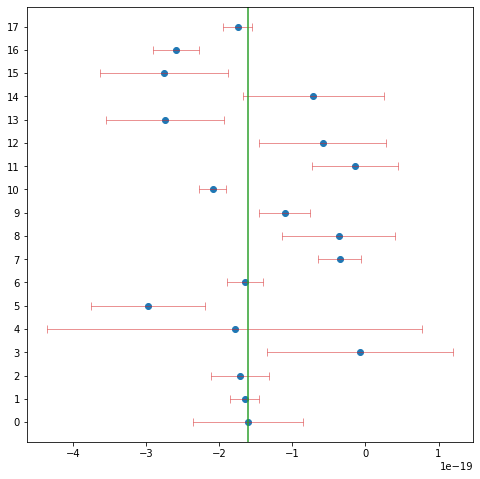

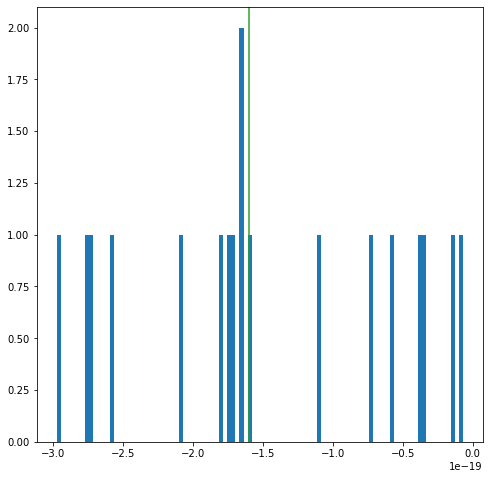

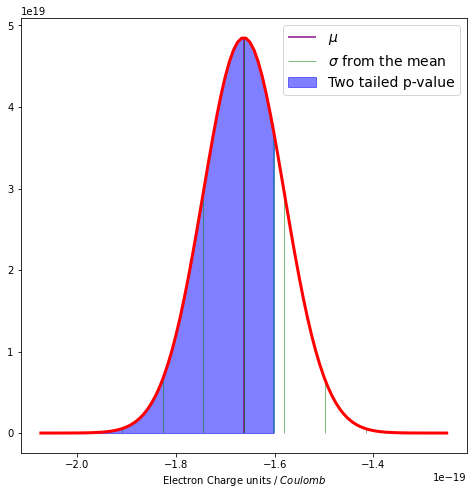

In [8]:
### calculating charge differences

startindex = 0
stopindex = 1
q_diff = np.array([])
sigma_q_diff = np.array ([])
n = np.array([])
for i in range (int(len(charge)/3)):
    for j in range(2):
        diff = -np.abs(charge[stopindex] - charge[startindex])
        sigma_diff = np.sqrt(sigma_charge[stopindex]**2 + sigma_charge[startindex]**2)
        if diff%e_lit >= 0.5:
            integer = diff//e_lit + 1
        else:
            integer = diff//e_lit
        q_diff = np.append(q_diff, diff)
        sigma_q_diff = np.append(sigma_q_diff, sigma_diff)
        n = np.append(n, integer)
        startindex += 1
        stopindex += 1
    startindex += 1
    stopindex += 1
n = np.abs(n)
print (f'charge differences: {q_diff}')
print (f'Integers: {n}')
    
# calculating the e-values

e_values = np.array([])
sigma_e_values = np.array([])
for i_i, n_i in enumerate(n):
    if n_i>0:
        e_values = np.append(e_values, q_diff[i_i]/n_i)
        sigma_e_values = np.append(sigma_e_values, sigma_q_diff[i_i]/n_i)
    else:
        e_values = np.append(e_values, q_diff[i_i])
        sigma_e_values = np.append(sigma_e_values, sigma_q_diff[i_i])

# calculating the final e-value

e_final = np.sum(e_values/(sigma_e_values**2))/np.sum(1/(sigma_e_values**2))
sigma_e_final = 1/np.sqrt(np.sum(1/(sigma_e_values**2)))
print (f'Final e value = {e_final} ± {sigma_e_final}')

Zscore = (e_lit - e_final)/sigma_e_final
print('Z score = ',Zscore)
cdf = scipy.stats.norm.cdf(Zscore,0,1)
print ("CDF = ",cdf)
if cdf>0.5:
    pvalue_2t = 2*(1-cdf)
else :
    pvalue_2t=2*(cdf)
print ("two tailed p-value = ",pvalue_2t)

#///////////////////////////
#PLOTTING                 //
#///////////////////////////

fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.add_subplot(111)
ax2 = fig2.add_subplot(111)
fig3, ax3 = plt.subplots()
sigma_list = np.array([])
mu = e_final
sigma = sigma_e_final
for i in range(-5,5):
    sigma_list= np.append(sigma_list, mu+i*sigma)
 #np.mean(G) #Mean of Experimental Value
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y = scipy.stats.norm.pdf(x, mu, sigma) # BELL CURVE
ax3.plot(x, y, color='red', linewidth=3)
ymin, ymax = ax3.get_ylim()
ax3.vlines(e_lit, ymin=0, ymax=np.interp(e_lit,x,y))
ax3.vlines(mu, ymin=0, ymax=np.interp(mu,x,y), color='purple', alpha=0.7, linewidth=2, label='$\mu$')
ax3.vlines(sigma_list, ymin=0, ymax=np.interp(sigma_list,x,y), color='green', alpha=0.5, linewidth=1, label='$\sigma$ from the mean')
x_fill = np.linspace(mu - 5*sigma, e_lit, 100)
y_fill = scipy.stats.norm.pdf(x_fill,mu,sigma)
ax3.fill_between(x_fill,y_fill,0, alpha=0.5, color='blue', label='Two tailed p-value')
ax3.set_xlabel('Electron Charge units / $Coulomb$')
ax3.legend(loc='best', fontsize=14)



# y,binEdges = np.histogram(e_values,bins=100)
ax2.hist(e_values, bins=100)#, weights=1/sigma_q_diff) # FIND RIGHT NUMBER OF BINS
ax2.axvline(e_lit, color='C2', label="Literature Value")
ax1.scatter(e_values, range(0,len(e_values)))
ax1.errorbar(e_values, range(0,len(e_values)), xerr=sigma_e_values, capsize=4, ecolor='C3', elinewidth=0.5, markeredgewidth=0.5,ls='None')
ax1.set_yticks(range(0,len(e_values)))
# ax1.scatter(-charge, range(0,len(charge)))
# ax1.errorbar(-sigma_charge, range(0,len(charge)), capsize=4, ecolor='C3', elinewidth=0.5, markeredgewidth=0.5,ls='None')
ax1.axvline(e_lit, label="Literature Value", color='C2')
# ax1.set_title('Weighted E Value Histogram')
plt.show()
fig1.savefig('millikan_scatter.png', bbox_inches='tight')
fig2.savefig('millikan_hist.png', bbox_inches='tight')
fig3.savefig('millikan_bellcurve.png', bbox_inches='tight')

In [9]:
for h in range(len(q_diff)): 
    print (f'{q_diff[h]} ± {sigma_q_diff[h]} and integer {n[h]}')

-4.813267858299617e-19 ± 2.253794116707445e-19 and integer 3.0
-2.9772295759721316e-18 ± 3.5455854435209236e-19 and integer 18.0
-6.848343927052843e-19 ± 1.5853549286324614e-19 and integer 4.0
-7.227011256406248e-21 ± 1.2708317543529447e-19 and integer 0.0
-1.7859972474014696e-19 ± 2.566488694738353e-19 and integer 1.0
-2.9734012674566387e-19 ± 7.84055847197295e-20 and integer 1.0
-4.950019450300293e-19 ± 7.271782197994094e-20 and integer 3.0
-3.526737140404705e-20 ± 2.98084577013683e-20 and integer 0.0
-3.6700640401682034e-20 ± 7.736130841760805e-20 and integer 0.0
-1.1062023996976994e-19 ± 3.4668350378578036e-20 and integer 0.0
-2.0900481805298483e-19 ± 1.82477717227436e-20 and integer 1.0
-1.3756675528749265e-20 ± 5.895546744128197e-20 and integer 0.0
-5.866501772749957e-20 ± 8.740513212768371e-20 and integer 0.0
-2.738943222163474e-19 ± 8.10763306710799e-20 and integer 1.0
-7.113093979485181e-20 ± 9.638888275199003e-20 and integer 0.0
-2.750440584375788e-19 ± 8.75078317464797e-20 a